---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS 

Discentes: 

- Pedro Henrique de Souza Fonsêca dos Santos
- Thiago Maia Souto


Título: **Resolução da Terceira Lista de Exercícios e Trabalhos**

---

# Importação das bibliotecas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Questão 1

Considere o problema de análise de componentes principais (PCA), isto é, determinar em uma distribuição de dados as componentes que tenham associadas a elas a maior variância e representar as mesmas no espaço de dados formado pelos autovetores da matriz de correlação. Neste sentido considere o seguinte problema. A tabela abaixo apresenta os dados relativos a amostras de solo. Para cada amostra, tem-se as medidas das porcentagens de areia (X1), sedimentos (X2), argila (X3) e a quantidade de material orgânico (X4). Da referida tabela obtenha as estatísticas descritivas de cada variável, isto é, a média, a mediana, o desvio padrão, os valores máximo e mínimo. Sob estas condições:

## Tabela Questão 1

In [ ]:
colunas = {
    "X1" : "Areia(%)",
    "X2" : "Sedimentos(%)",
    "X3" : "Argila(%)",
    "X4" : "MateriaOrganica(%)"
}

dados1 = {
      "X1" : [79.9, 78.5, 68.9, 62.2, 69.2, 67.8, 61.3, 71.6, 83.7, 67.1, 59.8, 66.7, 72.8, 60.9, 61.4, 75.0, 80.5, 71.3, 56.6, 55.9, 61.5, 59.2, 76.9, 58.0],
      "X2" : [13.9, 16.3, 22.6, 20.2, 23.7, 19.8, 24.9, 19.2, 10.5, 26.5, 27.9, 23.2, 14.5, 28.9, 29.2, 16.8, 11.9, 18.5, 28.9, 32.8, 28.1, 28.4, 16.3, 27.6],
      "X3" : [6.2, 7.2, 8.5, 17.6, 7.1, 12.4, 13.8, 9.2, 5.8, 6.4, 12.3, 10.1, 12.7, 10.2, 9.4, 8.2, 7.6, 10.2, 14.5, 11.3, 10.4, 12.4, 6.8, 14.4],
      "X4" : [3.3, 2.5, 3.6, 2.8, 0.9, 3.8, 2.2, 3.6, 4.4, 1.4, 3.5, 2.9, 1.9, 1.5, 2.5, 3.1, 3.8, 2.6, 2.8, 3.1, 2.7, 2.8, 2.9, 3.4]
      }
df1 = pd.DataFrame(dados1)


Mostrando a tabela da questão

In [ ]:
df1

,X1,X2,X3,X4
0,79.9,13.9,6.2,3.3
1,78.5,16.3,7.2,2.5
2,68.9,22.6,8.5,3.6
3,62.2,20.2,17.6,2.8
4,69.2,23.7,7.1,0.9
5,67.8,19.8,12.4,3.8
6,61.3,24.9,13.8,2.2
7,71.6,19.2,9.2,3.6
8,83.7,10.5,5.8,4.4
9,67.1,26.5,6.4,1.4


## Obtendo estatísticas descritivas

Obtendo a média de cada coluna

In [ ]:
df1_mean = df1.mean()
df1_mean

X1    67.779167
X2    22.108333
X3    10.195833
X4     2.833333
dtype: float64

Obtendo a mediana de cada coluna

In [ ]:
df1_median = df1.median()
df1_median

X1    67.45
X2    22.90
X3    10.15
X4     2.85
dtype: float64

Obtendo o desvio padrão de cada coluna

In [ ]:
df1_std = df1.std()
df1_std

X1    8.259697
X2    6.315675
X3    3.097752
X4    0.828129
dtype: float64

Obtendo os valores máximos e mínimos de cada coluna

In [ ]:
df1_max = df1.max()
df1_max

X1    83.7
X2    32.8
X3    17.6
X4     4.4
dtype: float64

In [ ]:
df1_min = df1.min()
df1_min

X1    55.9
X2    10.5
X3     5.8
X4     0.9
dtype: float64

## a) Obtenha desta tabela a matriz de covariancia.

Tendo em vista que as medidas das variáveis estão na mesma unidade (percentual) faz sentido utilizar a matriz de covariância. Caso contrário seria necessária a relização da padronização das medidas para que as variáveis com maior variação não dominassem as componentes principais.

Para obter a matriz de covariância basta diminuir a média de cada uma das colunas e em seguida realizar a operação $cov(X) = \frac{X^tX}{n_{amostras} - 1}$, sendo $X$ a matriz dos dados centralizados pela média.

In [ ]:
df1_trans = (df1 - df1_mean)
df1_cov = df1_trans.T.dot(df1_trans)/(df1.shape[0]-1)
df1_cov

,X1,X2,X3,X4
X1,68.222591,-48.913297,-18.377047,1.798551
X2,-48.913297,39.887754,8.520471,-1.814203
X3,-18.377047,8.520471,9.596069,-0.013333
X4,1.798551,-1.814203,-0.013333,0.685797


Plotando a matriz de covariância do conjunto de dados

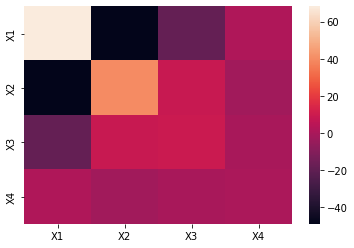

In [ ]:
sns.heatmap(df1_cov, xticklabels = df1_cov.columns.values, yticklabels=df1_cov.columns.values)
plt.show()

## b) Desta matriz determine os autovalores ordenados do máximo ao mínimo e os autovetores correspondentes.

Obtendo os autovalores e autovetores correspondentes utilizando a função **numpy.linalg.eig**. Tendo em vista que a função utilizada retorna os autovetores em uma matriz coluna, tornando necessária a trasposição da matriz resultante para obte-los na forma de matriz linha.

In [ ]:
autovalores, autovetores = np.linalg.eig(df1_cov)
# Fazendo a transposição da matriz de autovetores
autovetores = autovetores.T

Printando os autovalores associados a cada autovetor na ordem decrescente

In [ ]:
# Obtendo os indices dos autovalores ordenados de forma decrescente
idxs = np.argsort(autovalores)[::-1] 
# Reordenando o array de autovalores na ordem descrescente a partir dos indices
autoval_ord = autovalores[idxs]
# Reordenando a matriz de autovetores na ordem descrescente a partir dos indices
autovet_ord = autovetores[idxs]

# Printando os resultados obtidos
print(f"autovalores: {autoval_ord}")
print(f"autovetores: {autovet_ord}")

autovalores: [1.08992777e+02 8.76606779e+00 5.83237986e-01 5.01274801e-02]
autovetores: [[-0.78838911  0.58276295  0.1957206  -0.02287773]
 [ 0.22921536  0.57071056 -0.78485716 -0.07582228]
 [-0.02810589  0.02903718 -0.08328544  0.995706  ]
 [-0.5701868  -0.57778339 -0.58202768 -0.04792865]]


## c) Apresente as equações das componentes principais, isto é, cada componente é dada por:

$Y_i = \textbf{e}^t_i X_i = e_{1i} X_1 + e_{2i} X_2 + e_{3i} X_3 + e_{4i} X_4$
$i = 1,2,3,4$, onde $e_{ji}$ é a componente i do autovetor j.

Com o intuito de facilitar a visualização das equações correspondentes as componentes principais foi criada uma classe que implementasse uma visualização mais próxima do formato do enunciado

In [ ]:
class Equation:
  def __init__(self, autovetores: list) -> None:
    self.autovetores =  autovetores
    self.Y_i = ""

  def prints(self) -> None:
    for i in range(len(self.autovetores)):
      self.Y_i = f"Y_{i+1} = "
      for j in range(len(self.autovetores)):
        self.Y_i += f"{self.autovetores[i,j]}.X_{j+1} + "
      print(self.Y_i) 
      self.Y_i = ""


Pritando as equações das componentes principais utilizando a classe implementada acima

In [ ]:
eqs = Equation(autovet_ord)
eqs.prints()

Y_1 = -0.7883891132549201.X_1 + 0.5827629541289394.X_2 + 0.19572060428741714.X_3 + -0.022877728326925847.X_4 + 
Y_2 = 0.2292153588738573.X_1 + 0.5707105563237406.X_2 + -0.7848571604139262.X_3 + -0.07582227841448694.X_4 + 
Y_3 = -0.028105891512646333.X_1 + 0.029037175023023575.X_2 + -0.08328544410141386.X_3 + 0.9957059988419232.X_4 + 
Y_4 = -0.5701867976547061.X_1 + -0.577783387319366.X_2 + -0.582027677696849.X_3 + -0.04792865022972696.X_4 + 


Devido a um problema na concatenação das strings um símbolo extra de adição acabou ficando ao final de cada equação.

## d) Determine as componentes principais de forma que a soma das variâncias destas componentes correspondam 95% ou mais da variância total.


Sabendo que cada autovalor corresponde a variância de cada componente PCA, a soma deles representa a variância total dos dados, com isso pode-se determinar os percentuais de variância dividindo cada autovalor pela soma de todos, conforme é feito a seguir:

In [ ]:
variancia = autoval_ord/autoval_ord.sum()
variancia

array([9.20607671e-01, 7.40426061e-02, 4.92632062e-03, 4.23401844e-04])

Realizando uma soma cumulativa no array acima é possível obter a variância acumulada ao considerar cada componente, da seguinte forma

In [ ]:
variancia.cumsum()

array([0.92060767, 0.99465028, 0.9995766 , 1.        ])

Com base no resultado acima, percebe-se que considerando as componentes principais 1 e 2, obtem-se uma variância acumulada de cerca de 99.46%, superando os 95% do enunciado. Com isso, os dados com dimensionalidade reduzida podem ser obtidos a partir da projeção dos valores do conjunto de dados centralizado nas duas componentes principais através da multiplicação matricial, obtendo-se:

In [ ]:
df1_reduzido = np.dot(df1_trans,autovet_ord.T)[:,:2]
df1_reduzido

array([[-15.13218881,   1.19447335],
       [-12.41579018,   1.51907785],
       [ -0.9465768 ,   1.81036809],
       [  4.73635886,  -8.17662248],
       [ -0.75429326,   3.81043449],
       [ -0.95235023,  -3.11586574],
       [  7.45488328,  -2.67262612],
       [ -4.91961702,  -0.06056634],
       [-20.21291523,   0.35561418],
       [  2.38461686,   5.43856067],
       [ 10.06243386,  -0.22560071],
       [  1.4667044 ,   0.44582478],
       [ -7.88075559,  -5.08594971],
       [  9.41271098,   2.39709134],
       [  9.0138911 ,   3.23497563],
       [ -9.18305284,   0.17182884],
       [-16.50817821,  -0.94612971],
       [ -4.87243602,  -1.23786322],
       [ 13.61464172,  -2.06198946],
       [ 15.80612037,   2.49212719],
       [  8.48515799,   1.83009394],
       [ 10.86243528,  -0.10318476],
       [-11.24180693,   1.43594723],
       [ 11.72000642,  -2.45001933]])

Plotando os resultados obtidos a partir da redução de dimensionalidade

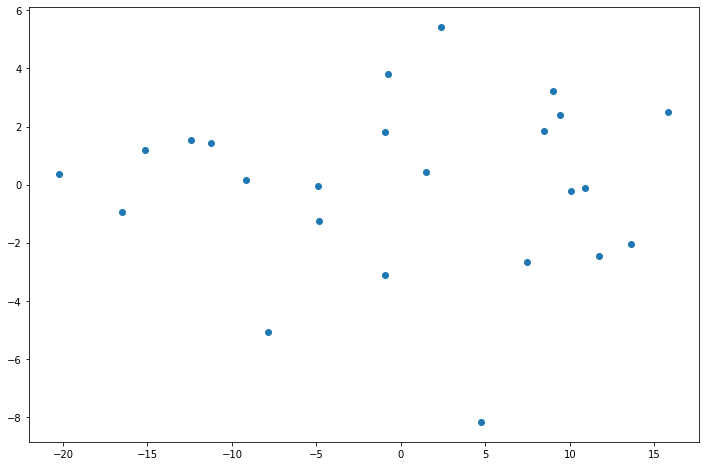

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.scatter(df1_reduzido[:,0], df1_reduzido[:,1])
plt.show()

## Utilizando a bibliteca scikit-learn

Para fins de comparação foi utilizada a implementação do algoritmo PCA da biblioteca scikit-learn.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df1_transformed = pca.fit_transform(df1)

Obtendo os autovalores

In [ ]:
eigenvalues = pca.explained_variance_
eigenvalues

array([1.08992777e+02, 8.76606779e+00, 5.83237986e-01, 5.01274801e-02])

Como pode ser visto acima, os autovalores obtidos são os mesmos obtidos anteriormente. Além disso, os autovetores podem ser obtidos da seguinte forma:

In [ ]:
eigenvectors = pca.components_
eigenvectors

array([[ 0.78838911, -0.58276295, -0.1957206 ,  0.02287773],
       [-0.22921536, -0.57071056,  0.78485716,  0.07582228],
       [ 0.02810589, -0.02903718,  0.08328544, -0.995706  ],
       [ 0.5701868 ,  0.57778339,  0.58202768,  0.04792865]])

Novamente os resultados obtidos dos autovetores nas duas situações é o mesmo, com apenas uma inversão de sinal que não altera o resultado final. Por fim, pode-se verificar que os resultados obtidos para os dados com dimensionalidade reduzida para as duas primeiras componentes principais são as mesmas apenas com uma inversão de sinal.

In [ ]:
df1_transformed[:,:2]

array([[ 15.13218881,  -1.19447335],
       [ 12.41579018,  -1.51907785],
       [  0.9465768 ,  -1.81036809],
       [ -4.73635886,   8.17662248],
       [  0.75429326,  -3.81043449],
       [  0.95235023,   3.11586574],
       [ -7.45488328,   2.67262612],
       [  4.91961702,   0.06056634],
       [ 20.21291523,  -0.35561418],
       [ -2.38461686,  -5.43856067],
       [-10.06243386,   0.22560071],
       [ -1.4667044 ,  -0.44582478],
       [  7.88075559,   5.08594971],
       [ -9.41271098,  -2.39709134],
       [ -9.0138911 ,  -3.23497563],
       [  9.18305284,  -0.17182884],
       [ 16.50817821,   0.94612971],
       [  4.87243602,   1.23786322],
       [-13.61464172,   2.06198946],
       [-15.80612037,  -2.49212719],
       [ -8.48515799,  -1.83009394],
       [-10.86243528,   0.10318476],
       [ 11.24180693,  -1.43594723],
       [-11.72000642,   2.45001933]])

Plotando os resultados obtidos a partir da redução de dimensionalidade utilizando o algoritmo da biblioteca do **scikit-learn**

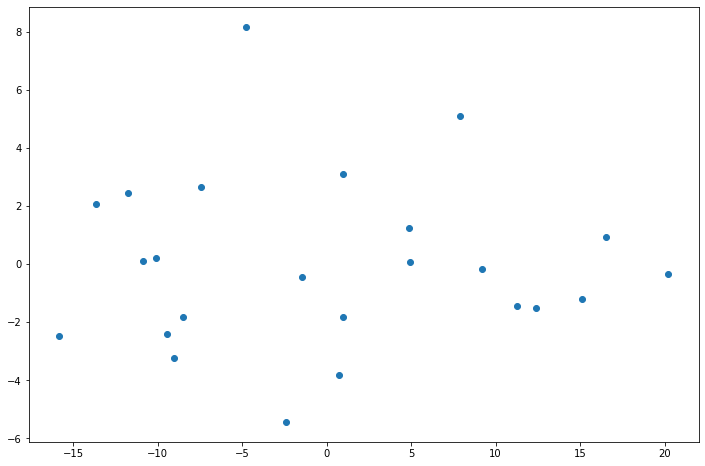

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.scatter(df1_transformed[:,0], df1_transformed[:,1])
plt.show()

# Questão 2

Considere o dados apresentados na tabela abaixo.Fazendo uso do algoritmo K-means, obtenha os centroides dos clusters. No processo de inicialização considere os itens (a) e (b) abaixo.


## Tabela Questão 2

In [2]:
dados2 = {
      "X1" : [-7.82, -6.68, 4.36, 6.72, -8.64, -6.87, 4.47, 6.73, -7.71, -6.91, 6.18, 6.72, -6.25, -6.94, 8.09, 6.81, -5.19, -6.38, 4.08, 6.27],
      "X2" : [-4.58, 3.16, -2.19, 0.88, 3.06, 0.57, -2.62, -2.01, 2.34, -0.49, 2.81, -0.93, -0.26, -1.22, 0.20, 0.17, 4.24, -1.74, 1.30, 0.93],
      "X3" : [-3.97, 2.71, 2.09, 2.80, 3.50, -5.45, 5.76, 4.18, -6.33, -5.68, 5.82, -4.04, 0.56, 1.13, 2.25, -4.15, 4.04, 1.43, 5.33, -2.78]
      }
df2 = pd.DataFrame(dados2)
df2

,X1,X2,X3
0,-7.82,-4.58,-3.97
1,-6.68,3.16,2.71
2,4.36,-2.19,2.09
3,6.72,0.88,2.80
4,-8.64,3.06,3.50
5,-6.87,0.57,-5.45
6,4.47,-2.62,5.76
7,6.73,-2.01,4.18
8,-7.71,2.34,-6.33
9,-6.91,-0.49,-5.68


Plotando os dados 

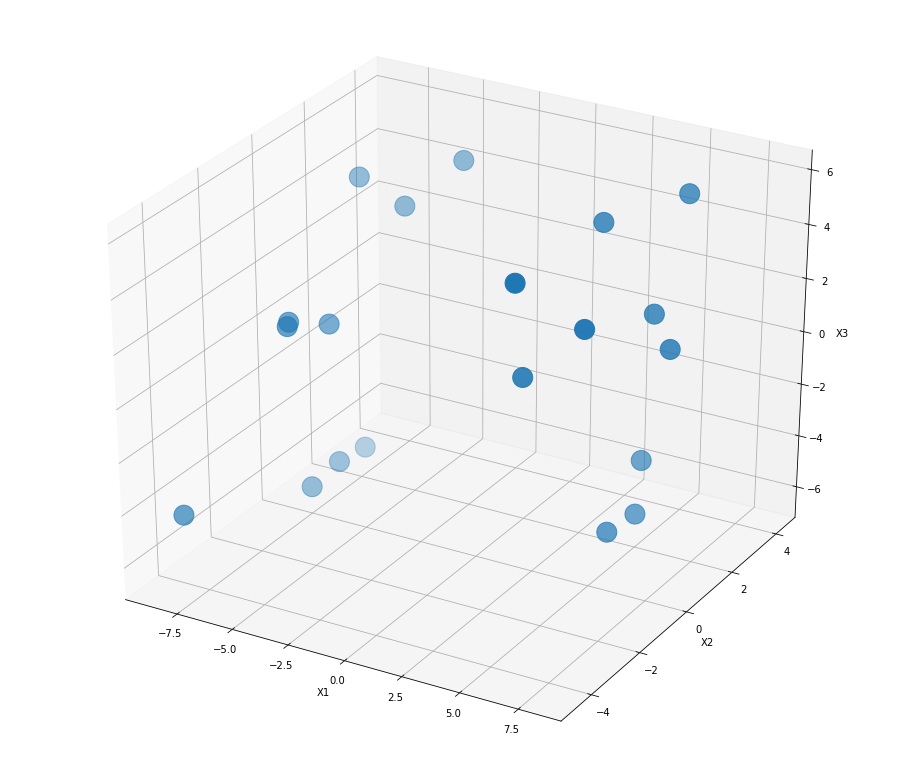

In [43]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(projection='3d')
ax.scatter(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2], s = 400)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

## a) Considere que existam três clusters e a inicialização dos centros seja aleatória.

Para resolução do problema foi utilizada a biblioteca **scikit-learn** que já possui uma implementação do algoritmo KMeans. Conforme o enunciado a inicialização dos centróides foi feita de forma aleatória e o número de clusters escolhido foi 3.

In [6]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 3, init = "random")
predicoes1 = kmeans1.fit_predict(df2)
centroids1 = kmeans1.cluster_centers_

Plotando os clusters identificados pelo kmeans

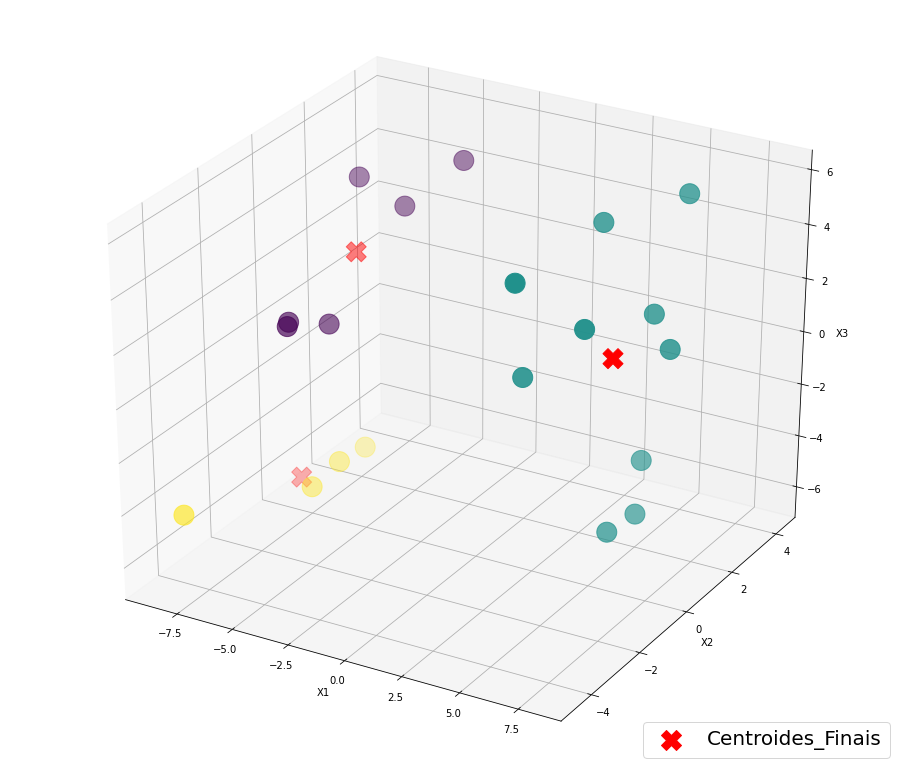

In [42]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(projection='3d')
ax.scatter(centroids1[:,0], centroids1[:,1], centroids1[:,2], marker = "X", s=400, c = "red", label = 'Centroides_Finais')
ax.scatter(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2], c = predicoes1, s = 400)
ax.legend(loc = 4, prop={'size': 20})
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

## b) Considere que existam três clusters e a inicialização dos centros seja dada por:
 $\textbf{m}_1=(0,0,0)^t, \textbf{m}_2=(1,1,1)^t, \textbf{m}_3=(-1,0,2)^t.$

Considerando agora os pontos iniciais dos centroides fornecidos pela questão, obtém-se





In [26]:
centroids2_initial =  np.c_[np.array([0,0,0]), np.array([1,1,1]), np.array([-1,0,2])].T
kmeans2 = KMeans(n_clusters = 3, init = np.array([[0,0,0], [1,1,1], [-1,0,2]]), n_init=1)
predicoes2 = kmeans2.fit_predict(df2)
centroids2 = kmeans2.cluster_centers_

Plotando os clusters identificados pelo KMeans

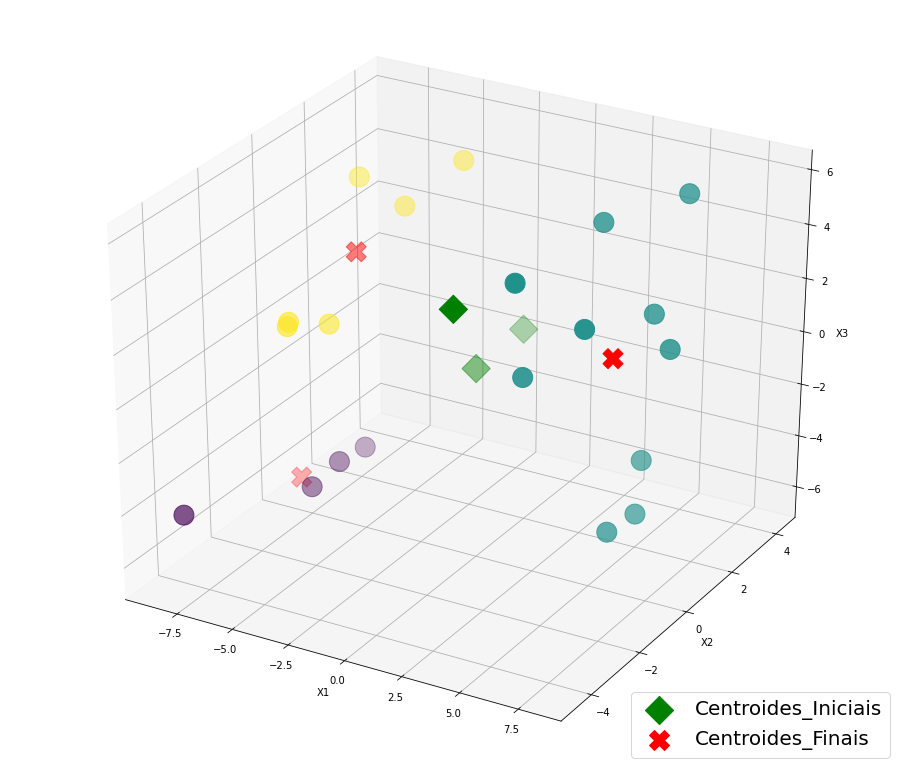

In [41]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(projection='3d')
ax.scatter(centroids2_initial[:,0], centroids2_initial[:,1], centroids2_initial[:,2], marker = "D", s=400, c = "green", label = 'Centroides_Iniciais')
ax.scatter(centroids2[:,0], centroids2[:,1], centroids2[:,2], marker = "X", s=400, c = "red", label = 'Centroides_Finais')
ax.scatter(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2], c = predicoes2, s = 400)
ax.legend(loc = 4, prop={'size': 20})
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

Conforme pode ser observado no gráfico acima, os clusters iniciados com os centróides definidos pelos pontos $\textbf{m}_1=(0,0,0)^t, \textbf{m}_2=(1,1,1)^t, \textbf{m}_3=(-1,0,2)^t$ mantiveram-se os mesmos em relação ao experimento anterior com a inicialização aleatória dos centróides.

## c) Repita o item a considerando que os centros iniciais sejam:
 $\textbf{m}_1=(-0.1,0,0.1)^t, \textbf{m}_2=(0,-0.1,0.1)^t, \textbf{m}_3=(-0.1,-0.1,0.1)^t.$ 

Compare com o resultado obtido no item (a) e explique a razão das diferenças, incluindo o número de interações para alcançar a convergência.


Considerando agora os pontos iniciais dos centroides fornecidos pela questão, obtém-se

In [39]:
centroids3_initial =  np.c_[np.array([-0.1,0,0.1]), np.array([0,-0.1,0.1]), np.array([-0.1,-0.1,0.1])].T
kmeans3 = KMeans(n_clusters = 3, init = np.array([[-0.1,0,0.1], [0, -0.1, 0.1], [-0.1, -0.1, 0.1]]), n_init=1)
predicoes3 = kmeans3.fit_predict(df2)
centroids3 = kmeans3.cluster_centers_

Plotando os clusters identificados pelo KMeans

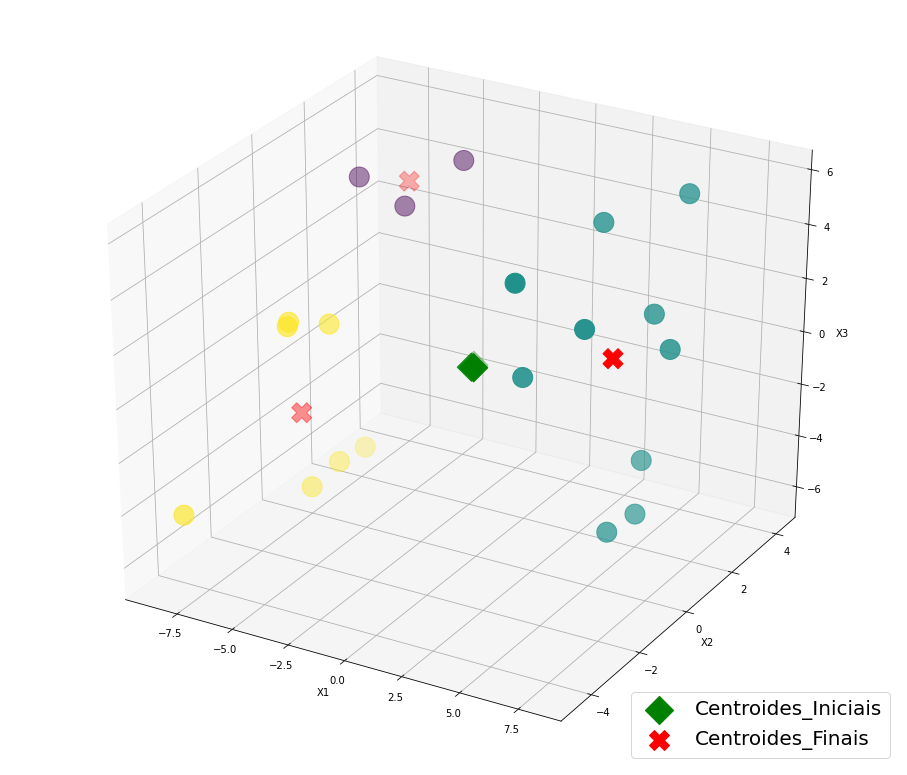

In [44]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(projection='3d')
ax.scatter(centroids3_initial[:,0], centroids3_initial[:,1], centroids3_initial[:,2], marker = "D", s=400, c = "green", label = 'Centroides_Iniciais')
ax.scatter(centroids3[:,0], centroids3[:,1], centroids3[:,2], marker = "X", s=400, c = "red", label = 'Centroides_Finais')
ax.scatter(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2], c = predicoes3, s = 400)
ax.legend(loc = 4, prop={'size': 20})
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

Como pode ser visto na imagem acima, os clusters identificados considerando os pontos dados por  $\textbf{m}_1=(-0.1,0,0.1)^t, \textbf{m}_2=(0,-0.1,0.1)^t, \textbf{m}_3=(-0.1,-0.1,0.1)^t$ diferenciaram-se dos casos anteriores, mostrando que o algoritmo KMeans apresenta uma dependência dos centróides iniciais no processo de identificação dos clusters. Além disso é possível obter a quantidade de iterações para cada inicialização dos centróides da seguinte forma: 

In [ ]:
execucoes = [kmeans1, kmeans2, kmeans3]
for i, exec in enumerate(execucoes):
  print(f"Execução {i+1}, Quantidade de iterações {exec.n_iter_} ")

Execução 1, Quantidade de iterações 3 
Execução 2, Quantidade de iterações 2 
Execução 3, Quantidade de iterações 4 


Como pode ser visto acima, a terceira execução cujos centróides foram iniciados nos pontos $\textbf{m}_1=(-0.1,0,0.1)^t, \textbf{m}_2=(0,-0.1,0.1)^t, \textbf{m}_3=(-0.1,-0.1,0.1)^t$ foi a que obteve o número máximo de iterações (4 iterações), seguida da execução cujos centróides foram inicializados aleatoriamente (3 iterações) e o menor número de iterações foi obtido para a execução cujos centróides foram iniciados nos pontos  $\textbf{m}_1=(0,0,0)^t, \textbf{m}_2=(1,1,1)^t, \textbf{m}_3=(-1,0,2)^t$ (2 iterações). Com base no resultado obtido percebe-se que tanto os clusters dependem dos pontos de inicialização dos centróides como também o número de iterações para garantir a convergência.

# Questão 3

Considere o processo de identificação de aglomerados (“clusters”) com base em uma técnica hierárquica aglomerativa. Neste problema considere o método de Ward resumido nas equações abaixo. Considere o critério $R^2$ para parada do processo aglomerativo no dendograma e identificação do número de aglomerados

## Tabela questão 3 e 4

In [48]:
dados3 = {
    "paises" : ["Reino Unido", "Austrália", "Canadá", "Estados Unidos", "Japão", "França", "Cingapura", "Argentina", "Uruguai", "Cuba", "Colômbia", "Brasil", "Paraguai", "Egito", "Nigéria", "Senegal", "Serra Leoa", "Angola", "Etiópia", "Moçambique", "China"],
      "expc_vida" : [0.88, 0.90, 0.90, 0.87, 0.93, 0.89, 0.88, 0.81, 0.82, 0.85, 0.77, 0.71, 0.75, 0.70, 0.44, 0.47, 0.23, 0.34, 0.31, 0.24, 0.76],
      "educacao" : [0.99, 0.99, 0.98, 0.98, 0.93, 0.97, 0.87, 0.92, 0.92, 0.90, 0.85, 0.83, 0.83, 0.62, 0.58, 0.37, 0.33, 0.36, 0.35, 0.37, 0.80],
      "pib" : [0.91, 0.93, 0.94, 0.97, 0.93, 0.92, 0.91, 0.80, 0.75, 0.64, 0.69, 0.72, 0.63, 0.60, 0.37, 0.45, 0.27, 0.51, 0.32, 0.36, 0.61],
      "est_politica" : [1.10, 1.26, 1.24, 1.18, 1.20, 1.04, 1.41, 0.55, 1.05, 0.07, -1.36, 0.47, -0.87, 0.21, -1.36, -0.68, -1.26, -1.98, -0.55, 0.20, 0.39]
      }
df3 = pd.DataFrame(dados3)
df3

,paises,expc_vida,educacao,pib,est_politica
0,Reino Unido,0.88,0.99,0.91,1.10
1,Austrália,0.90,0.99,0.93,1.26
2,Canadá,0.90,0.98,0.94,1.24
3,Estados Unidos,0.87,0.98,0.97,1.18
4,Japão,0.93,0.93,0.93,1.20
5,França,0.89,0.97,0.92,1.04
6,Cingapura,0.88,0.87,0.91,1.41
7,Argentina,0.81,0.92,0.80,0.55
8,Uruguai,0.82,0.92,0.75,1.05
9,Cuba,0.85,0.90,0.64,0.07


Plotando os dados 

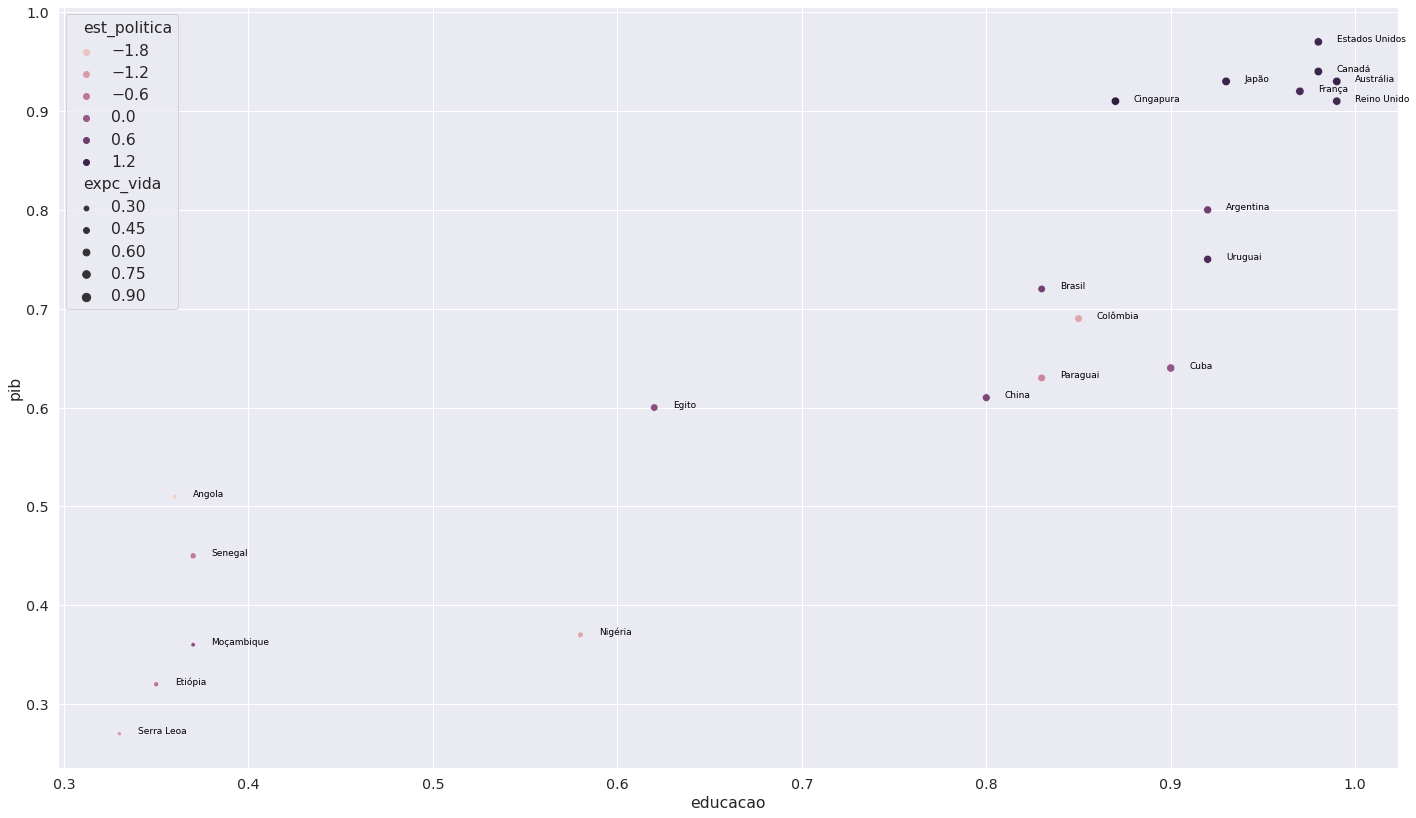

In [140]:
fig = plt.figure(figsize=(24,14))
sns.set(font_scale=1.3)

p1 = sns.scatterplot(data = df3, x = 'educacao', y = 'pib' , hue = 'est_politica', size = 'expc_vida')

for line in range(0,df3.shape[0]):
     p1.text(df3.educacao[line]+ 0.01, df3.pib[line], 
     df3.paises[line], horizontalalignment='left', 
     fontsize = 9, color='black')


plt.show()

Método de Ward:

## a) Inicialmente, cada elemento é considerado como um único conglomerado

## b) Em cada passo do algoritmo de agrupamento (formação do dendograma) calcule a similaridade fazendo uso da distância Euclidiana ao quadrado entre os conglomerados formados, isto é

$d(C_1, C_2) = \frac{n_l n_i}{n_l + n_i} ||\textbf{m}_l - \textbf{m}_i||^2$ onde, 

$n_i$ é o número de elementos no conglomerado $C_i$
$\textbf{m}_i$ é o centroide do conglomerado $C_i$ dado por $\textbf{m}_i = \frac{1}{n_i} \sum\limits_{j=1}^{n_i} \textbf{m}_{ij}$

Junte os aglomerados com menor distância.

Critério de parada pelo coeficiente $R_2$.

Calcule o coeficiente $R_2$ em função do número de passos e pare o processo quando for observado um salto elevado no valor do coeficiente. Este ponto determina o número de aglomerados.

$R^2(g_k) = \frac{SSB}{SST_c}$

$SST_c = \sum\limits_{i=1}^{g_k} \sum\limits_{j=1}^{n_i} ||\textbf{x}_{ij} - \textbf{m}_i||^2 $

$SSB = \sum\limits_{i=1}^{g_k}n_i ||\textbf{m}_i - \textbf{m}||$

$\textbf{m}$: vetor média global,
$g_k$: número de conglomerados

Construa dendondograma e indique o ponto de corte ou de parada determinando com isto os clusters.

## Resolução

Para resolução do problema em questão foi utilizada a biblioteca **scipy** para realização da clusterização pelo método de Ward

In [97]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

Definindo uma função auxiliar para realizar a criação da matriz de ligação (linkage matrix) e plotagem do dendograma

In [98]:
def plot_dendrogram(model,**kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

Utilizando a classe de **AgglomerativeClustering** da biblioteca **scikit-learn** utilizando o método de **ward** e com a distância euclidiana como medida de similaridade. Além disso, utilizou-se como hiperparâmetros do modelo um número de clusters desconhecido e um limiar de distância igual a 1.

In [99]:
# Selecionando apenas as colunas numericas do conjunto de dados
X = df3.iloc[:,1:]

# Obtendo as labels do conjunto de dados
labels = list(df3.iloc[:,0])

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward', affinity= 'euclidean')

model = model.fit(X)

Plotando o dendograma resultante 

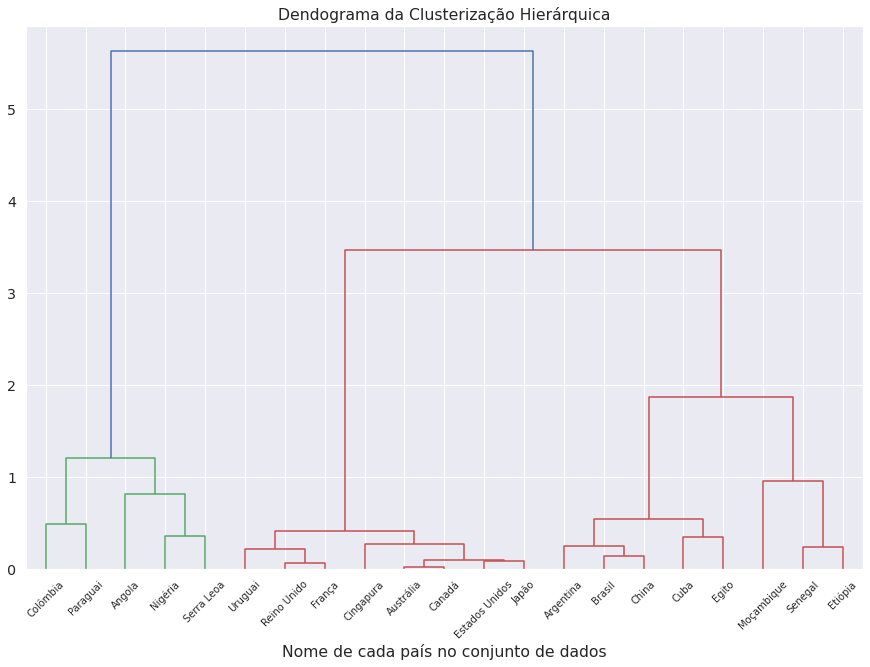

In [100]:
# plot the top three levels of the dendrogram
fig = plt.figure(figsize=(15,10))
plt.title("Dendograma da Clusterização Hierárquica")
mat = plot_dendrogram(model, labels = labels)
plt.xlabel("Nome de cada país no conjunto de dados")
plt.show()

# Questão 4

 Repita o problema acima considerando:

## a) A rede neural competitiva que corresponde ao método do K-means ou k-médias que é uma técnica de clusterização para determinação de clusters por particionamento.


Utilizando o algoritmo K-Means implementado pela biblioteca **scikit-learn** utilizando o número de clusters inicial de 3 clusters e o processo de inicialização aleatorio.

In [106]:
from sklearn.cluster import KMeans

# Obtendo apenas as colunas com dados numericos
X = np.array(df3.iloc[:,1:])

# Obtendo as labels de cada amostra
labels = list(df3.iloc[:,0])

kmeans1 = KMeans(n_clusters = 3, init = "random")
predicoes1 = kmeans1.fit_predict(X)

Visualizando o resultado dos agrupamentos realizados pelo KMeans através de uma tabela

In [107]:
df3_agrupado = df3.copy()
df3_agrupado['classe'] = predicoes1
df3_agrupado

,paises,expc_vida,educacao,pib,est_politica,classe
0,Reino Unido,0.88,0.99,0.91,1.10,1
1,Austrália,0.90,0.99,0.93,1.26,1
2,Canadá,0.90,0.98,0.94,1.24,1
3,Estados Unidos,0.87,0.98,0.97,1.18,1
4,Japão,0.93,0.93,0.93,1.20,1
5,França,0.89,0.97,0.92,1.04,1
6,Cingapura,0.88,0.87,0.91,1.41,1
7,Argentina,0.81,0.92,0.80,0.55,2
8,Uruguai,0.82,0.92,0.75,1.05,1
9,Cuba,0.85,0.90,0.64,0.07,2


Paises agrupados com a label = 0

In [110]:
df3_agrupado.query('classe == 0')

,paises,expc_vida,educacao,pib,est_politica,classe
10,Colômbia,0.77,0.85,0.69,-1.36,0
12,Paraguai,0.75,0.83,0.63,-0.87,0
14,Nigéria,0.44,0.58,0.37,-1.36,0
15,Senegal,0.47,0.37,0.45,-0.68,0
16,Serra Leoa,0.23,0.33,0.27,-1.26,0
17,Angola,0.34,0.36,0.51,-1.98,0
18,Etiópia,0.31,0.35,0.32,-0.55,0


Paises agrupados com a label = 1

In [111]:
df3_agrupado.query('classe == 1')

,paises,expc_vida,educacao,pib,est_politica,classe
0,Reino Unido,0.88,0.99,0.91,1.10,1
1,Austrália,0.90,0.99,0.93,1.26,1
2,Canadá,0.90,0.98,0.94,1.24,1
3,Estados Unidos,0.87,0.98,0.97,1.18,1
4,Japão,0.93,0.93,0.93,1.20,1
5,França,0.89,0.97,0.92,1.04,1
6,Cingapura,0.88,0.87,0.91,1.41,1
8,Uruguai,0.82,0.92,0.75,1.05,1


Paises agrupados com a label = 2

In [112]:
df3_agrupado.query('classe == 2')

,paises,expc_vida,educacao,pib,est_politica,classe
7,Argentina,0.81,0.92,0.80,0.55,2
9,Cuba,0.85,0.90,0.64,0.07,2
11,Brasil,0.71,0.83,0.72,0.47,2
13,Egito,0.70,0.62,0.60,0.21,2
19,Moçambique,0.24,0.37,0.36,0.20,2
20,China,0.76,0.80,0.61,0.39,2


## b) O Algoritmos SOM

Para a utilização do algoritmo SOM foi implementada a classe a seguir:

In [ ]:
import itertools
from collections import defaultdict, Counter

class SOM:

  def __init__(self, h: int, w :int, dim: int, L0 : float, decay_rate : float, sigma0 : float):

    self.shape = (h,w,dim)
    self.som = np.zeros(self.shape)

    # Hiperparametros
    self.L0 = L0
    self.decay_rate = decay_rate
    self.sigma0 = sigma0

  def fit(self, data):
    """ 
    Responsável pelo treinamento do SOM
    """

    for t in itertools.count():
      # Criterio de parada do treinamento
      if self.sigma(t) < 0.5:
        break

      # Escolhendo indices aleatorios do conjunto de dados sem reposição
      self.data_idx = np.random.choice(range(data.shape[0]))

      # Descobrindo o BMU para a amostra aleatoria do conjunto de dados
      self.bmu = self.find_bmu(data[self.data_idx])

      # Atualizando os pesos do BMU e vizinhos
      self.update_som(self.bmu, data[self.data_idx], t)

  def labels_map(self, data, labels):
    winmap = defaultdict(list)
    for sample, label in zip(data,labels):
      winmap[self.find_bmu(sample)].append(label)
    
    for position in winmap:
      winmap[position] = Counter(winmap[position])
    
    return winmap

  def find_bmu(self, input_vec):
    """
    Percorre todos os pontos da rede e compara a distancia
      do vetor de entrada com os pesos dos neuronios da rede
    """

    list_bmu = []

    # Percorrendo as linhas da rede
    for i in range(self.shape[0]):

      # Percorrendo as colunas da rede
      for j in range(self.shape[1]):

        # Calcula distancia euclidianda entre vetor de entrada
        #  e os pesos do neuronio na posicao (i,j)
        dist = np.linalg.norm(input_vec - self.som[i,j])

        # Adiciona informações sobre a posição (i,j) do neuronio
        #  e distancia entre ele e o vetor de entrada
        list_bmu.append(((i,j), dist))

    # Ordenando a lista de possiveis BMU a partir da menor distancia
    #  em ordem do menor para o maior
    list_bmu.sort(key = lambda x: x[1])

    # Retorna a posição (i,j) do neuronio BMU
    return list_bmu[0][0]

  def update_som(self, bmu, input_vec, t):
    """
     Percorre todos os neuronios da rede e atualiza seus pesos
       com base na equação de atualização
    """

    # Percorrendo as linhas da rede
    for i in range(self.shape[0]):

      # Percorrendo as colunas da rede
      for j in range(self.shape[1]):

        # Calculando a distancia euclidiana entre o BMU
        #  e os demais neuronios da rede
        dist_to_bmu = np.linalg.norm(np.array(bmu) - np.array((i,j)))
        
        # Atualizando cada neuronio da rede
        self.update_neuron(i,j, dist_to_bmu, input_vec, t)

    
  def update_neuron(self, i, j, dist_to_bmu, input_vec, t):
    """
      Atualiza os pesos de um unico neuronio com base na equação de atualização
    """

    self.som[i, j,:] += self.N(dist_to_bmu,t)*self.L(t)*(input_vec - self.som[i, j,:])

  def L(self, t):
    """
     Implementa a equação da taxa de aprendizagem variável
    """

    return self.L0*np.exp(-t/self.decay_rate)


  def N(self, dist_to_bmu, t):
    """
      Implementa a equação da penalilidade pela distancia até o BMU
    """
    # Obtém o valor de sigma para o valor atual da iteração t
    current_sigma = self.sigma(t)

    return np.exp(-(dist_to_bmu**2)/(2*current_sigma**2))

  def sigma(self, t):
    """
      Implementa a equação da atenuação da distancia 
    """
    return self.sigma0*np.exp(-t/self.decay_rate)


Preparando os dados para utilização da classe SOM implementada acima

In [ ]:
# Obtendo a dimensão dos vetores de pesos dos neuronios do SOM
dim = df3.shape[1] -1 

# Obtendo apenas as colunas com dados numericos
X = np.array(df3.iloc[:,1:])

# Obtendo as labels de cada amostra
labels = list(df3.iloc[:,0])

Para realização do treinamento da classe SOM foi escolhido um mapa de tamanho 5x5 cuja dimensão dos vetores de pesos de cada neurônio foi dado pela quantidade de colunas numéricas do conjunto de dados, além disso foi utilizado $L_0 = 0.8$, $\lambda = 1E2$ e $\sigma_0 = 4$. Sendo $\lambda$ a taxa de decaimento.

In [ ]:
som = SOM(5,5,dim, L0= 0.8, decay_rate=1e2, sigma0= 4)
som.fit(X)

Plotando a rede SOM utilizando as labels dos países

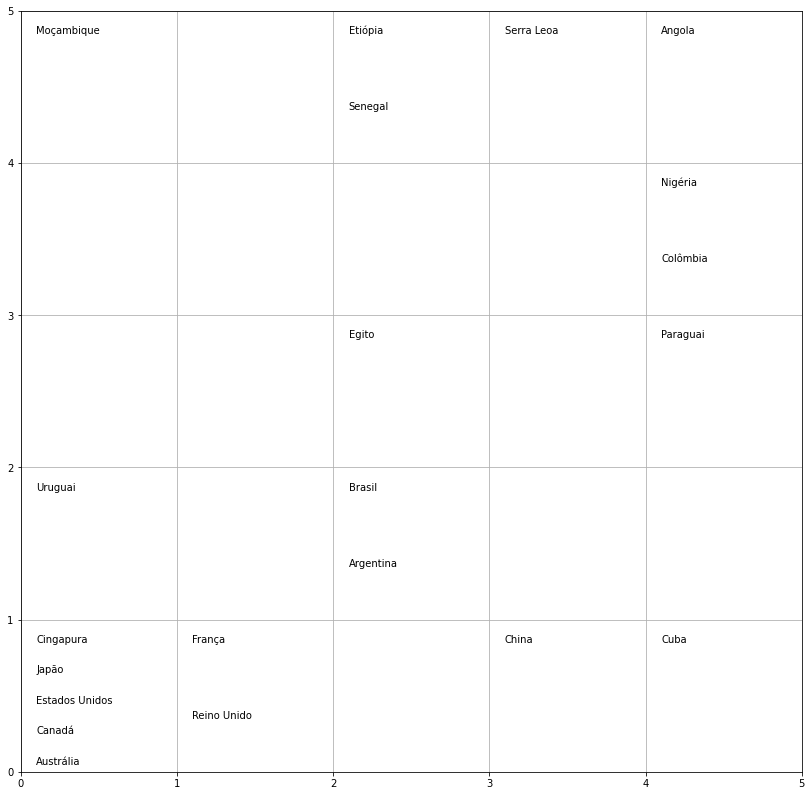

In [ ]:
# Obtendo as labels para cada neuronio da rede
map = som.labels_map(X, labels)

# Configurando a plotagem
plt.figure(figsize=(14, 14))
for p, countries in map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .1
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, c, fontsize=10)

plt.xticks(np.arange(5+1))
plt.yticks(np.arange(5+1))
plt.grid()

plt.show()

Plotando os planos de features

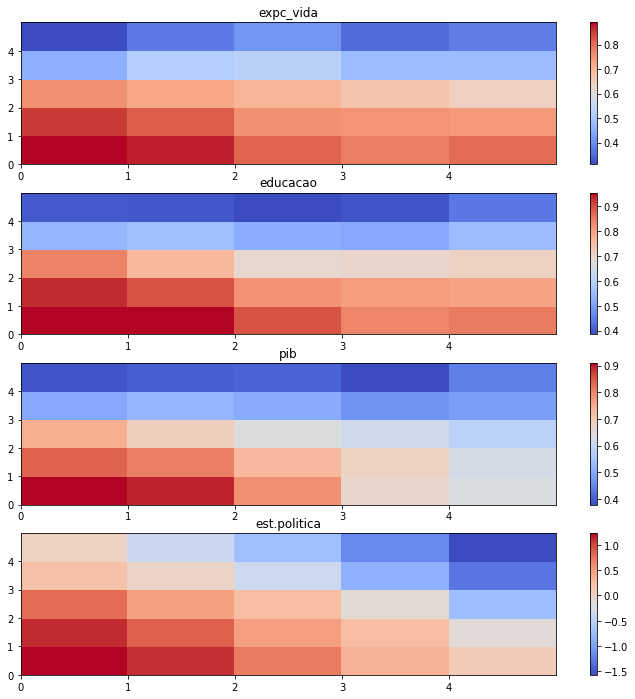

In [ ]:
W = som.som

plt.figure(figsize = (12,12))

for i,f in enumerate(df3.columns[1:]):
  plt.subplot(4,1, i+1)
  plt.title(f)
  plt.pcolor(W[:,:,i].T, cmap = 'coolwarm')
  plt.xticks(np.arange(5))
  plt.yticks(np.arange(5))
  plt.colorbar()
  

plt.show()


# Questão 5

A propriedade de ordenação topológica do algoritmo SOM pode ser usada para formar uma representação bidimensional abstrata de um espaço de entrada de alta dimensionalidade. Para investigar esta forma de representação, considere uma grade bidimensional consistindo de 40x40 neurônios que é treinada tendo como entrada os dados oriundos de quatro distribuições gaussianas, $C_1$, $C_2$, $C_3$, e $C_4$, em um espaço de entrada de dimensionalidade igual a oito, isto é $\textbf{x} = (x_1, x_2, ..., x_8)^t$. Todas as nuvens têm variâncias unitária, mas centros ou vetores média diferentes dados por $\textbf{m}_1 = (0,0,0,0,0,0,0,0)^t, \textbf{m}_2 = (4,0,0,0,0,0,0,0)^t, \textbf{m}_3 = (0,0,0,4,0,0,0,0)^t, \textbf{m}_4 = (0,0,0,0,0,0,0,4)^t.$

Calcule o mapa produzido pelo algoritmo SOM, com cada neurônio do mapa sendo rotulado com a classe particular mais representada pelos pontos de entrada em sua volta. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2, constituído pela grade de neurônios.

### Criando o conjunto de dados

In [ ]:
# Dimensão dos dados
dim = 8
# Número de pontos a ser amostrado
N = 100
# Matriz de Covariância para as distribuições
cov = np.identity(dim)
# Definição dos vetores média de cada distribuição
m1 = np.array([0,0,0,0,0,0,0,0])
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])
# Concatenando os vetores media em uma lista
m = [m2, m3, m4]
# Criando a primeira distribuição
c1 = np.random.multivariate_normal(m1, cov, N)
# Criando um dataframe para armazenar as distribuições
df = pd.DataFrame(c1, columns = [f'x{i+1}' for i in range(8)]) 
# Criando uma lista para armazenar as demais distribuições
dists = []
# Criando e concatenando cada distribuição 
for i in range(len(m)):
  dists.append(np.random.multivariate_normal(m[i], cov, N))
  df = pd.concat([df, pd.DataFrame(dists[i], columns = [f'x{i+1}' for i in range(8)])], axis = 0, ignore_index= True)
# Criando coluna label para cada distribuição
df['label'] = [f'{j+1}' for j in range(4) for k in range(N)]

Mostrando a tabela construida para os dados

In [ ]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,label
0,0.242449,0.185881,0.651299,2.442104,0.131352,-0.656342,1.253165,-0.700934,1
1,-0.496958,-0.742503,0.184094,0.664910,-0.748756,-0.782737,1.739329,1.764525,1
2,0.663507,-0.002724,1.471198,0.214752,-1.747489,-0.173467,-0.845842,0.983032,1
3,1.545315,0.375620,0.401494,-0.495200,0.230890,0.181403,0.582474,-1.092820,1
4,1.228746,0.277783,0.058839,-0.546359,-0.018468,-1.623747,0.826823,0.113436,1
...,...,...,...,...,...,...,...,...,...
395,0.436841,-0.682228,0.956900,1.554054,-0.382144,-1.977528,-1.264339,4.809710,4
396,0.150716,1.215076,1.409067,0.190077,0.412752,1.903360,-0.605664,2.795905,4
397,0.354248,0.348050,1.423744,2.390745,-0.055549,0.156122,-0.537484,4.388170,4
398,-0.289143,-1.262087,-0.312181,0.265995,3.375652,1.169887,-0.372317,3.155139,4


### Usando o SOM 

Preparando os dados para o treinamento do som

In [ ]:
# Obtendo a dimensão dos vetores de pesos dos neuronios do SOM
dim = df.shape[1] -1 

# Obtendo apenas as colunas com dados numericos
X = np.array(df.iloc[:,:-1])

# Obtendo as labels de cada amostra
labels = list(df.iloc[:,-1])

Treinando o modelo

In [ ]:
som = SOM(40,40,dim, L0= 0.8, decay_rate=1e2, sigma0= 10)
som.fit(X)

Plotando a rede SOM obtida a partir do treinamento

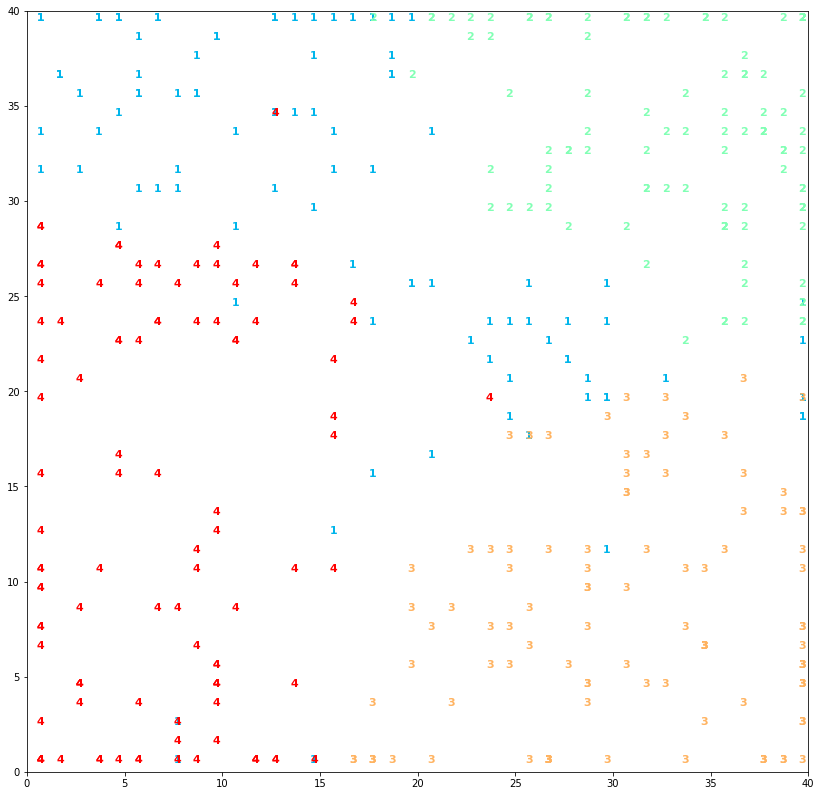

In [ ]:
plt.figure(figsize=(14, 14))
wmap = {}
im = 0
for x, t in zip(X, labels):  # scatterplot
    w = som.find_bmu(x)
    wmap[w] = im
    plt.text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(int(t)/4), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.som.shape[0], 0,  som.som.shape[1]])
plt.show()

# Trabalho

### Pesquise e apresente um trabalho sobre Clusterização Fuzzy. 

####Artigos
https://towardsdatascience.com/fuzzy-c-means-clustering-is-it-better-than-k-means-clustering-448a0aba1ee7

https://medium.com/geekculture/fuzzy-c-means-clustering-fcm-algorithm-in-machine-learning-c2e51e586fff

####Documentação da biblioteca
https://pypi.org/project/fuzzy-c-means/

####Utilização do algoritmo C-Means

In [ ]:
!pip install fuzzy-c-means

     |████████████████████████████████| 15.7 MB 8.2 MB/s 
     |████████████████████████████████| 10.9 MB 38.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


####Importando as bibliotecas

In [ ]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

####Gerando os dados

In [ ]:
n_samples = 5000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

####Iniciando o algoritmo

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

####Colentando os labels e centros e visualizando a predição

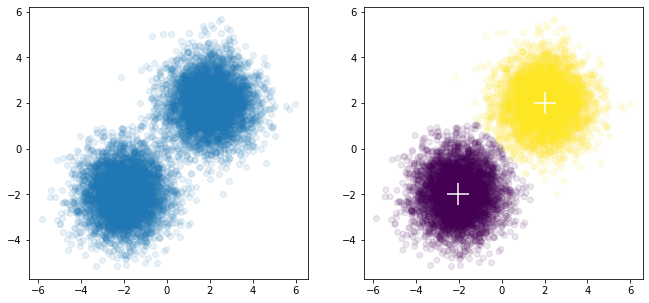

In [ ]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

In [ ]:
fcm.soft_predict(X)

array([[9.90728417e-01, 9.27158349e-03],
       [7.80823188e-01, 2.19176812e-01],
       [9.99982527e-01, 1.74729832e-05],
       ...,
       [2.06829045e-02, 9.79317096e-01],
       [4.81801625e-03, 9.95181984e-01],
       [4.97627837e-02, 9.50237216e-01]])

In [ ]:
np.sum(fcm.soft_predict(X), axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

#### Agora iremos utilizar o dataset iris

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

####Iniciando o algoritmo, treinando e coletando labels e centros

In [ ]:
X2 = iris.data

fcm2 = FCM(n_clusters=3)
fcm2.fit(X2)

In [ ]:
fcm2_centers = fcm2.centers
fcm2_labels = fcm2.predict(X2)

####Dicionário criado para escolher as cores dos labels

In [ ]:
dict_color = {'0': 'red', '1':'blue', '2':'green'}
color = []
color_c_means = []

for i in iris.target:
    color.append(dict_color[str(i)])

for i in fcm2_labels:
    color_c_means.append(dict_color[str(i)])

color_c_means

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'green',


####Visualização e comparação dos dados

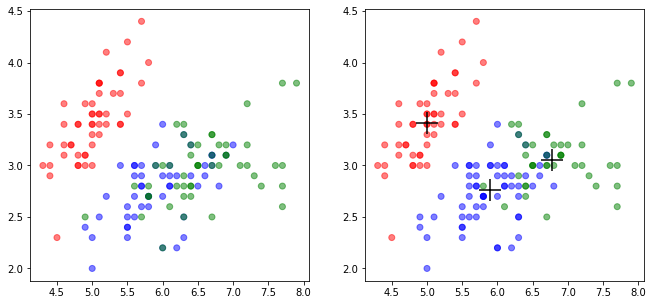

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X2[:,0], X2[:,1], c=color, alpha=.5)
axes[1].scatter(X2[:,0], X2[:,1], c=color_c_means, alpha=.5)
axes[1].scatter(fcm2_centers[:,0], fcm2_centers[:,1], marker="+", s=500, c='k')
plt.show()

In [ ]:
fcm2_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
fcm2.soft_predict(X2)

array([[9.96623586e-01, 2.30437985e-03, 1.07203402e-03],
       [9.75852513e-01, 1.66495321e-02, 7.49795468e-03],
       [9.79825902e-01, 1.37595147e-02, 6.41458341e-03],
       [9.67427406e-01, 2.24650615e-02, 1.01075327e-02],
       [9.94470355e-01, 3.76171021e-03, 1.76793507e-03],
       [9.34574048e-01, 4.48062808e-02, 2.06196717e-02],
       [9.79491647e-01, 1.40038304e-02, 6.50452290e-03],
       [9.99547262e-01, 3.11532893e-04, 1.41204964e-04],
       [9.30379710e-01, 4.77178530e-02, 2.19024368e-02],
       [9.82722940e-01, 1.19354924e-02, 5.34156713e-03],
       [9.68042286e-01, 2.17567663e-02, 1.02009477e-02],
       [9.92137147e-01, 5.43179213e-03, 2.43106084e-03],
       [9.70640116e-01, 2.01827035e-02, 9.17718029e-03],
       [9.22969819e-01, 5.17941795e-02, 2.52360015e-02],
       [8.89758885e-01, 7.26094368e-02, 3.76316780e-02],
       [8.41344886e-01, 1.04349166e-01, 5.43059483e-02],
       [9.46925314e-01, 3.55791080e-02, 1.74955783e-02],
       [9.96652726e-01, 2.28848

In [ ]:
np.cumsum(fcm2.soft_predict(X2), axis=1)

array([[0.99662359, 0.99892797, 1.        ],
       [0.97585251, 0.99250205, 1.        ],
       [0.9798259 , 0.99358542, 1.        ],
       [0.96742741, 0.98989247, 1.        ],
       [0.99447035, 0.99823206, 1.        ],
       [0.93457405, 0.97938033, 1.        ],
       [0.97949165, 0.99349548, 1.        ],
       [0.99954726, 0.9998588 , 1.        ],
       [0.93037971, 0.97809756, 1.        ],
       [0.98272294, 0.99465843, 1.        ],
       [0.96804229, 0.98979905, 1.        ],
       [0.99213715, 0.99756894, 1.        ],
       [0.97064012, 0.99082282, 1.        ],
       [0.92296982, 0.974764  , 1.        ],
       [0.88975889, 0.96236832, 1.        ],
       [0.84134489, 0.94569405, 1.        ],
       [0.94692531, 0.98250442, 1.        ],
       [0.99665273, 0.99894121, 1.        ],
       [0.90413529, 0.96969204, 1.        ],
       [0.97918904, 0.99334636, 1.        ],
       [0.96860444, 0.99045973, 1.        ],
       [0.98483293, 0.99520614, 1.        ],
       [0.